# Please add your name and ID number to this notebook:

NAME:Sean McNamara

ID: 20329733

How to perform data munging in terms of:
1. Filling in missing values in a data set,
2. Encoding and attribute scaling
3. Identifying outliers, i.e. extreme attribute values, and deciding whether to cut them off or transform,
4. generating new attributes from the existing ones.

### Lab 2: Data Preparation

### Task 1

In the exploration of the loans dataset, we discovered a few issues, which need to be resolved before the dataset is ready for machine learning (ML). This exercise is typically referred as either data preparation, or data preprocessing, or data munging, or data wrangling. Here are the problems, we are already aware of:

There are missing values in some columns. We can estimate these values depending on the number of missing values and the expected importance of the column. 

### A. Import Python Modules and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank_et2.csv")
df.tail()

Unnamed: 0   age           job  marital  education default  balance  \
1995        1995  20.0       student   single        NaN      no     2785   
1996        1996  28.0        admin.   single  secondary      no      127   
1997        1997  81.0       retired  married    primary      no     1154   
1998        1998  46.0      services  married    primary      no     4343   
1999        1999  40.0  entrepreneur  married  secondary      no     6403   

      ratio_bal_ln  ratio_ln_inc housing loan    contact  day month  duration  \
1995     -2.170524      1.081071      no   no   cellular   16   sep       327   
1996      0.811788      1.134496      no   no   cellular   16   sep      1334   
1997      0.504655      0.042190      no   no  telephone   17   sep       231   
1998     -0.965874      0.302708     yes   no        NaN   20   sep       185   
1999     -0.800893      1.066659      no   no   cellular   22   sep       208   

      campaign  pdays  previous poutcome subscribed  
1995         2     -1         0      NaN        yes  
1996         2     -1         0      NaN        yes  
1997         1     -1         0      NaN        yes  
1998         1     -1         0      NaN        yes  
1999         2     -1         0      NaN        yes

How to check for missing values in the data set. 

In [97]:
df.isna().sum()

Unnamed: 0        0
age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [98]:
#Before we start transforming the dataset let's make a copy of it.

df_original = df

### B. Process and Encode the Categorical Features

In [99]:
#Columns with Unnamed: 0 are unlikely to contain useful information and should be dropped.

df.drop('poutcome', axis=1, inplace=True)
df.tail()

df.drop('contact', axis=1, inplace=True)
df.tail()

Unnamed: 0   age           job  marital  education default  balance  \
1995        1995  20.0       student   single        NaN      no     2785   
1996        1996  28.0        admin.   single  secondary      no      127   
1997        1997  81.0       retired  married    primary      no     1154   
1998        1998  46.0      services  married    primary      no     4343   
1999        1999  40.0  entrepreneur  married  secondary      no     6403   

      ratio_bal_ln  ratio_ln_inc housing loan  day month  duration  campaign  \
1995     -2.170524      1.081071      no   no   16   sep       327         2   
1996      0.811788      1.134496      no   no   16   sep      1334         2   
1997      0.504655      0.042190      no   no   17   sep       231         1   
1998     -0.965874      0.302708     yes   no   20   sep       185         1   
1999     -0.800893      1.066659      no   no   22   sep       208         2   

      pdays  previous subscribed  
1995     -1         0        yes  
1996     -1         0        yes  
1997     -1         0        yes  
1998     -1         0        yes  
1999     -1         0        yes

### TASK 2

### Encode Ordinal Categorical Attributes

In [100]:
# Create a mapper

scale_mapper = {
    "yes": 1,
    "no": 0,
}

df['subscribed'] = df['subscribed'].replace(scale_mapper)

df.tail()

Unnamed: 0   age           job  marital  education default  balance  \
1995        1995  20.0       student   single        NaN      no     2785   
1996        1996  28.0        admin.   single  secondary      no      127   
1997        1997  81.0       retired  married    primary      no     1154   
1998        1998  46.0      services  married    primary      no     4343   
1999        1999  40.0  entrepreneur  married  secondary      no     6403   

      ratio_bal_ln  ratio_ln_inc housing loan  day month  duration  campaign  \
1995     -2.170524      1.081071      no   no   16   sep       327         2   
1996      0.811788      1.134496      no   no   16   sep      1334         2   
1997      0.504655      0.042190      no   no   17   sep       231         1   
1998     -0.965874      0.302708     yes   no   20   sep       185         1   
1999     -0.800893      1.066659      no   no   22   sep       208         2   

      pdays  previous  subscribed  
1995     -1         0           1  
1996     -1         0           1  
1997     -1         0           1  
1998     -1         0           1  
1999     -1         0           1

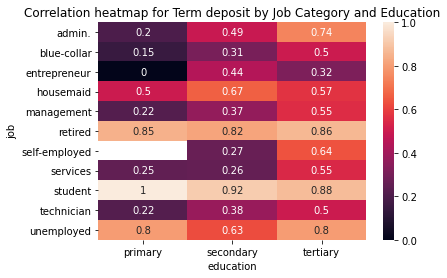

In [91]:
#pivot_table_CGL = df.pivot_table(values='loan', 
                           #index='age', 
                           #columns='education',
                           #aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
#sns.heatmap(pivot_table_CGL, annot=True)
#plt.show()
#--------------


pivot_table_LCG = df.pivot_table(values='subscribed', 
                           index='job', 
                           columns='education',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.title('Correlation heatmap for Term deposit by Job Category and Education')
plt.show()

As above students of any education level are most likely to take a Term deposit. There is a positive correlation (1) between
a student having Primary education and taking a Term Deposit. This could be misleading though due to low number surveyed
and assumingly as current job is as a student they are not finished with education.Those Retired of any education level are highly likely to take a Term deposit.There is no indication of any correlation (0) between an entrepreneur of primary & unknown education taking a Term deposit

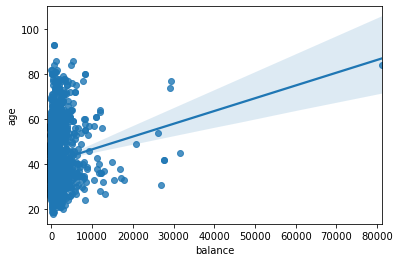

In [101]:
sns.regplot(data=df, x='balance', y='age')
plt.show()

In [77]:
#Based on the above plot, I'm going to use the following replacement criteria 
#Balance 0 - 300 indicates the age of 40 yrs
#Balance 301 - 10,000 indicates age of 43 yrs
#Balance 10,001 - 20,000 indicates age of 46yrs 
#Balance 20,001 - 30,000 indicates age of 58
#Balance greater than 30,001 indicates age of 60

In [102]:
#df['age'].fillna(df['age'].median(), inplace=True)

df['age'].fillna(df['age'].median(), inplace=True)

df.isna().sum()

Unnamed: 0        0
age               0
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
subscribed        0
dtype: int64

Note that there is a few categorical columns, such a age. There are ordinal categorical attributes and some numerical attributes. Such as, balance, but age has blanks in it. 

One-Hot Encode All Other Categorical Attributes.

Distribution Analysis for Categorical Attributes

In [103]:
# Plot the frequency table for loans
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for loan:') 
print(frequency_table)

Frequency Table for loan:
yes     250
no     1750
Name: loan, dtype: int64


In [104]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['education', 'marital', 'housing'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

Unnamed: 0   age           job default  balance  ratio_bal_ln  \
1995        1995  20.0       student      no     2785     -2.170524   
1996        1996  28.0        admin.      no      127      0.811788   
1997        1997  81.0       retired      no     1154      0.504655   
1998        1998  46.0      services      no     4343     -0.965874   
1999        1999  40.0  entrepreneur      no     6403     -0.800893   

      ratio_ln_inc loan  day month  ...  previous  subscribed  \
1995      1.081071   no   16   sep  ...         0           1   
1996      1.134496   no   16   sep  ...         0           1   
1997      0.042190   no   17   sep  ...         0           1   
1998      0.302708   no   20   sep  ...         0           1   
1999      1.066659   no   22   sep  ...         0           1   

      education_secondary  education_tertiary  education_nan  marital_married  \
1995                    0                   0              1                0   
1996                    1                   0              0                0   
1997                    0                   0              0                1   
1998                    0                   0              0                1   
1999                    1                   0              0                1   

      marital_single  marital_nan  housing_yes  housing_nan  
1995               1            0            0            0  
1996               1            0            0            0  
1997               0            0            0            0  
1998               0            0            1            0  
1999               0            0            0            0  

[5 rows x 23 columns]

In [105]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

Unnamed: 0   age  balance  ratio_bal_ln  ratio_ln_inc  day  duration  \
0           0  32.0      392      1.300134      0.473895    1       957   
1           1  39.0      688     -0.193701      0.237021    1       233   
2           2  59.0     1035      1.334266      0.121981    1       126   
3           3  47.0      398      0.362286      1.251328    1       274   
4           4  54.0     1004      0.072075     -0.533738    1       479   

   campaign  pdays  previous  ...  month_dec  month_feb  month_jan  month_jul  \
0         2    131         2  ...          0          0          0          0   
1         2    133         1  ...          0          0          0          0   
2         2    239         1  ...          0          0          0          0   
3         1    238         2  ...          0          0          0          0   
4         1    307         1  ...          0          0          0          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0          0          0          0          0          0          0  
1          0          0          0          0          0          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 42 columns]

### C. Treatment of Missing Values in Numerical Columns

Check for Missing Values
It is often useful to impute missing values as many ML algorithms do not work with missing data and even if they do, imputing these values often helps to build a more accurate predictive model.

In [106]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

Unnamed: 0             0
age                    0
balance                0
ratio_bal_ln           0
ratio_ln_inc           0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
education_secondary    0
education_tertiary     0
education_nan          0
marital_married        0
marital_single         0
marital_nan            0
housing_yes            0
housing_nan            0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
default_yes            0
loan_yes               0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0


As you can see above there is no missing values.

### Impute Missing Values

There are numerous ways to impute (i.e., fill in) the missing values in a numerical column, e.g. column LoanAmount – the simplest being replacement by mean, which can be done with the following code:

In [83]:
df['age'].fillna(df['age'].mean(), inplace=True)

Imputing missing values with the mean (alternatively, the media, the most frequent, or a constant) may introduce bias in the dataset. A better method is to build an ML model (typically, kNN) to predict age on the basis of other columns.

Since, the purpose now is to practice data munging prior applying ML algorithms, we can take an approach, which lies somewhere in between these 2 extremes. We may hypothesise that attributes education and balance combined can give a good estimate of loan.

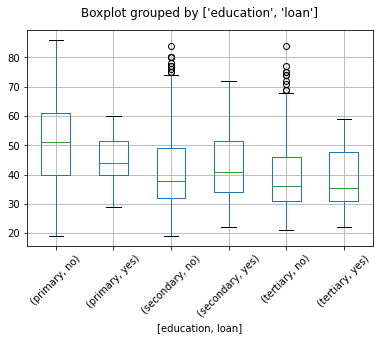

In [86]:
df.boxplot(column='age', by=['education','loan'], rot=45)
plt.title("")
plt.show()

We can see some variation in the median of balance for each group and these medians can be used for imputing the missing values in each group. Next, we create a pivot table, which contains the median values for all four groups.is for Categorical Attributes

In [92]:
ptable = df.pivot_table(values='age', 
                        index='job',
                        columns='education',  
                        aggfunc=np.median)
ptable

education      primary  secondary  tertiary
job                                        
admin.            48.5       40.0      33.0
blue-collar       42.5       37.0      29.0
entrepreneur      55.0       42.5      43.5
housemaid         50.5       48.5      32.0
management        53.0       39.0      37.0
retired           70.0       63.0      68.0
self-employed      NaN       43.0      35.0
services          47.0       36.0      32.0
student           22.0       25.0      27.0
technician        49.0       38.0      35.0
unemployed        39.0       40.0      35.0

### D. Rescaling Features

Many ML algorithms assume that all numerical features are on the same scale. Two standard techniques in the Python module scikit-learn for achieving this are:

MinMaxScaler - rescales a column to the interval [0,1]StandardScaler - rescales a numerical column so that it has mean 0 and standard deviation 1.

Here we use a third technique, called RobustScaler to loan and balance which does a better job in the presence of outliers (we observed outliers in columns loan and balance). RobustScaler transforms each value in a column by subtracting the median from it and then dividing by the interquartile range.

In [ ]:
#robust_scaler = RobustScaler()
#df[['balance',
    #'loan']] = robust_scaler.fit_transform(df[['balance',
                                                     #'loan']])

### E. Treatment of Outliers

Balance & Education

In the previous lab exercise, we observed that education contains some extreme values. Confirms the presence of a lot of outliers/extreme values. 

This may be attributed to the campaign disparity in the society and the income factor for banks/loans. 
Income, education would be a factor here.

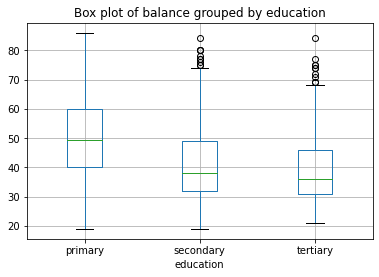

In [4]:
# Boxplots of balancee, grouped by the categorical attribute the bank provide.
df.boxplot(column='age', by='education')
plt.title('Box plot of balance grouped by education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

Let's also take a look at these histograms after we have rescaled them below.Main focus was on balance, job, and job , education.

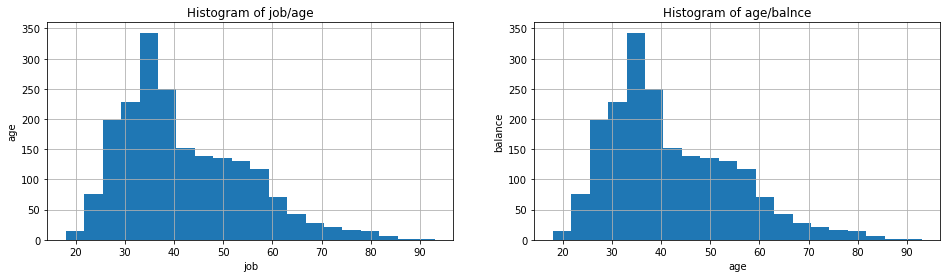

In [89]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of job/age")
ax1.set_xlabel('job')
ax1.set_ylabel('age')
            
df['age'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of age/balnce")
ax3.set_xlabel('age')
ax3.set_ylabel('balance')
df['age'].hist(bins=20)

plt.show()

As you can see both of the histograms are skewed to the left, which is not ideal. Many ML algorithms work best when the features are not skewed to either side.

Finally, before treating the outliers, let's find the minimum values in these columns.

In [120]:
df[['balance', 'age']].min()

balance   -980.0
age         18.0
dtype: float64

Since the extreme values are practically possible in both columns, i.e. some people might have large income balance and also apply for a loan anyway, instead of ignoring the data rows with extreme values we can transform them to diminish the negative impact of outliers to ML models.

A typical way to do this is to apply a log transformation. However, we do have negative values in one of the columns after rescaling and we need to add a constant to all values in order to shift them to a positive range before applying a log transformation.

Here we are have chosen to shift the values to the interval [1,+∞] before applying a log transformation.

In [163]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.26)

Let's plot again.

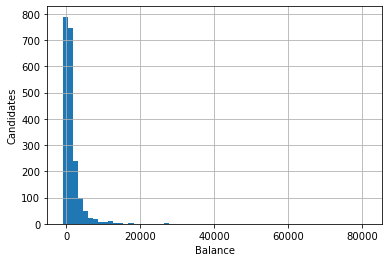

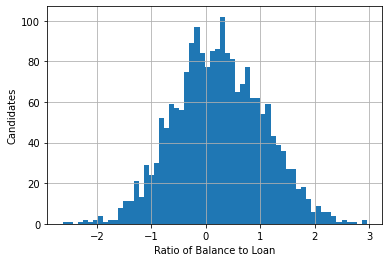

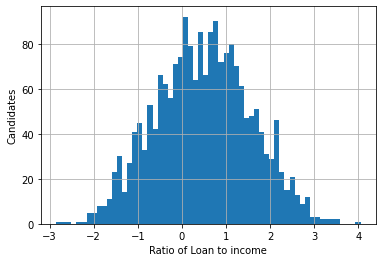

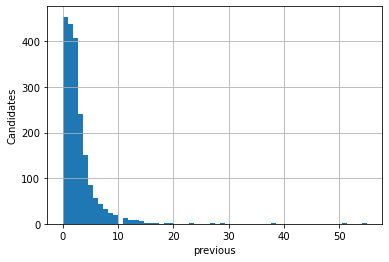

In [27]:
# Histogram of numerical columns using the command:

df['balance'].hist(bins=60)
plt.xlabel('Balance')
plt.ylabel('Candidates')
plt.show()

df['ratio_bal_ln'].hist(bins=60)
plt.xlabel('Ratio of Balance to Loan')
plt.ylabel('Candidates')
plt.show()
#
# Normal distribution
#

df['ratio_ln_inc'].hist(bins=60)
plt.xlabel('Ratio of Loan to income')
plt.ylabel('Candidates')
plt.show()
#
# Normal distribution
#

df['previous'].hist(bins=60)
plt.xlabel('previous')
plt.ylabel('Candidates')
plt.show()
#
# Most people haven't been contacted that often .. .although some outlier values here (e.g. contacted > 50 times)
#

In [90]:
df['age'].value_counts()

33.0    95
35.0    90
31.0    87
34.0    84
32.0    77
        ..
86.0     2
76.0     2
81.0     2
18.0     1
79.0     1
Name: age, Length: 68, dtype: int64

Note that Loan_Amount_Term is rather an ordinal than a continuous numerical feature with more than 80% being the 30 - 40 year old bracket. 

We can divide all values by 480 (effectively applying MinMaxScaler to it). If we applied RobustScaler and/or log transformation to it instead then it would become even more skewed to the right 

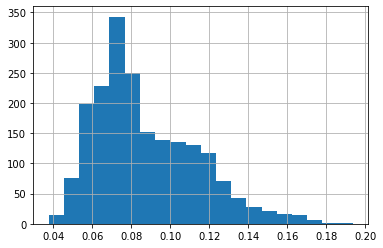

In [176]:
df['age'] = df['age']/480
df['age'].hist(bins=20)
plt.show()

### F. Creation of Derived Features